# Assignment 2: Avocado Project

## Contents

1. Importing the Libraries and Loading the dataset
2. Exploring and Preprocessing the data
3. Classification Task
4. Comparison and selection of best performing classification model for given dataset
5. Predict the region using classification based on sample input or user input
6. Regression task
7. Build a Regression model using the training data
8. Evaluate the model on the testing data
9. MSE and R-Square for other Regression models
10. Predict the average price using regression based on sample input or user input

## 1. Importing the Libraries and Loading the dataset

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import  GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


# Loading the dataset 
# Loading the baseball dataset from the github url link into a Pandas DataFrame.

url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/avocado.csv.zip"
avocado_data = pd.read_csv(url, compression='zip')

## 2. Exploring and Preprocessing the data

- 2.1 explore data table 
- 2.2 Conducted any necessary data cleaning steps.
- 2.3 Explore Target variable, Features, their distribution and Outliers
- 2.4 Correlation matrix and Heatmap
- 2.5 Split the data into features (X), target variable (y), training and testing sets for model evaluation.


### 2.1 Explore data table

In [3]:

# Display the first few rows of the dataset

avocado_data.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Check data types 

print(avocado_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [5]:
# Check  statistics

print(avocado_data.describe())

         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05 

### 2.2 Conducting any necessary data cleaning steps

- Checked for missing values in the dataset.
- In this case, no missing values were found, so no imputation is needed.

In [6]:
# Check for missing values

print(avocado_data.isnull().sum())

# Drop any rows with missing values

avocado_data = avocado_data.dropna()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


### 2.3 Explore Target variable, Features, their distribution and Outliers

- Distribution of target variable appeared normal.
- Outliers were found, 

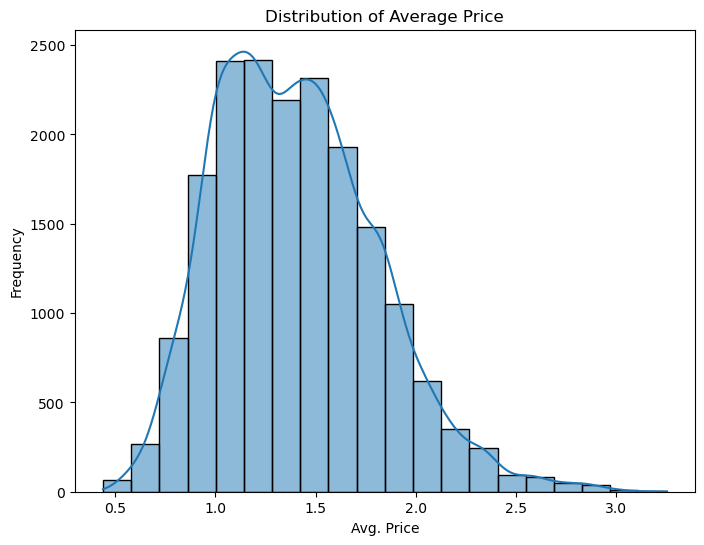

In [7]:
# Visualize the distribution of the target variable (number of wins)

plt.figure(figsize=(8, 6))
sns.histplot(avocado_data['AveragePrice'], bins=20, kde=True)
plt.title('Distribution of Average Price')
plt.xlabel('Avg. Price')
plt.ylabel('Frequency')
plt.show()


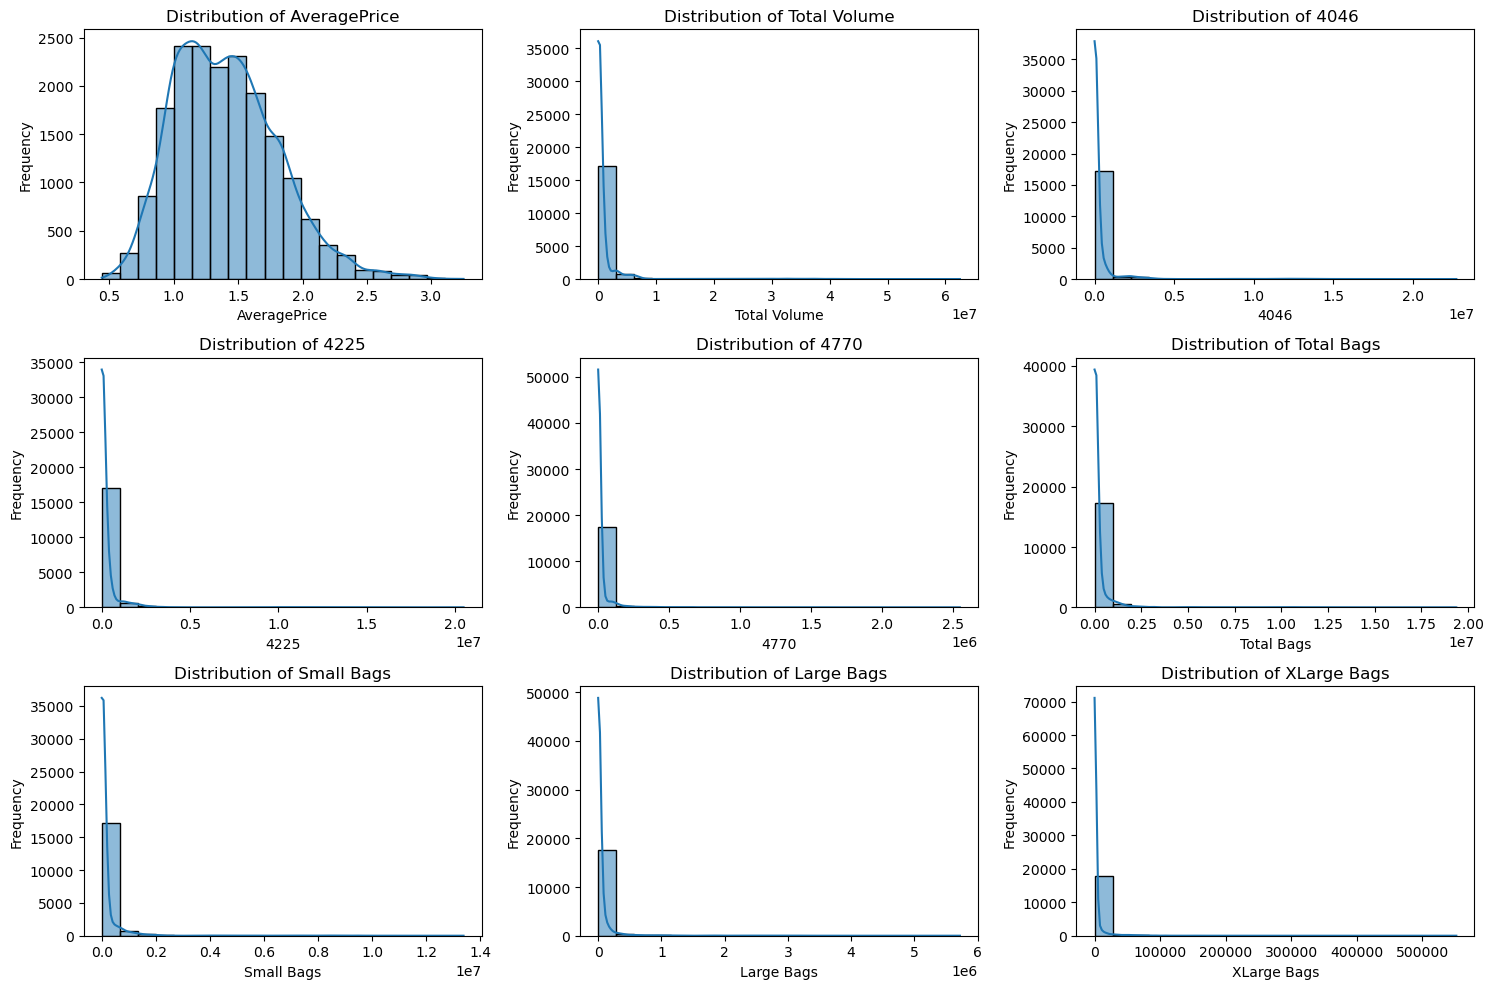

In [8]:

# Select numerical features for visualization

numerical_features = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
#numerical_features = ['AveragePrice', '4046', '4225', '4770']


# Create a grid of histograms for all numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(avocado_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# Data Preprocessing
# Convert 'Date' to datetime
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])

# Handle categorical variables

label_encoder = LabelEncoder()
avocado_data['type'] = label_encoder.fit_transform(avocado_data['type'])
avocado_data['region'] = label_encoder.fit_transform(avocado_data['region'])


# C

avocado_data.head()

avocado_data.tail()




,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


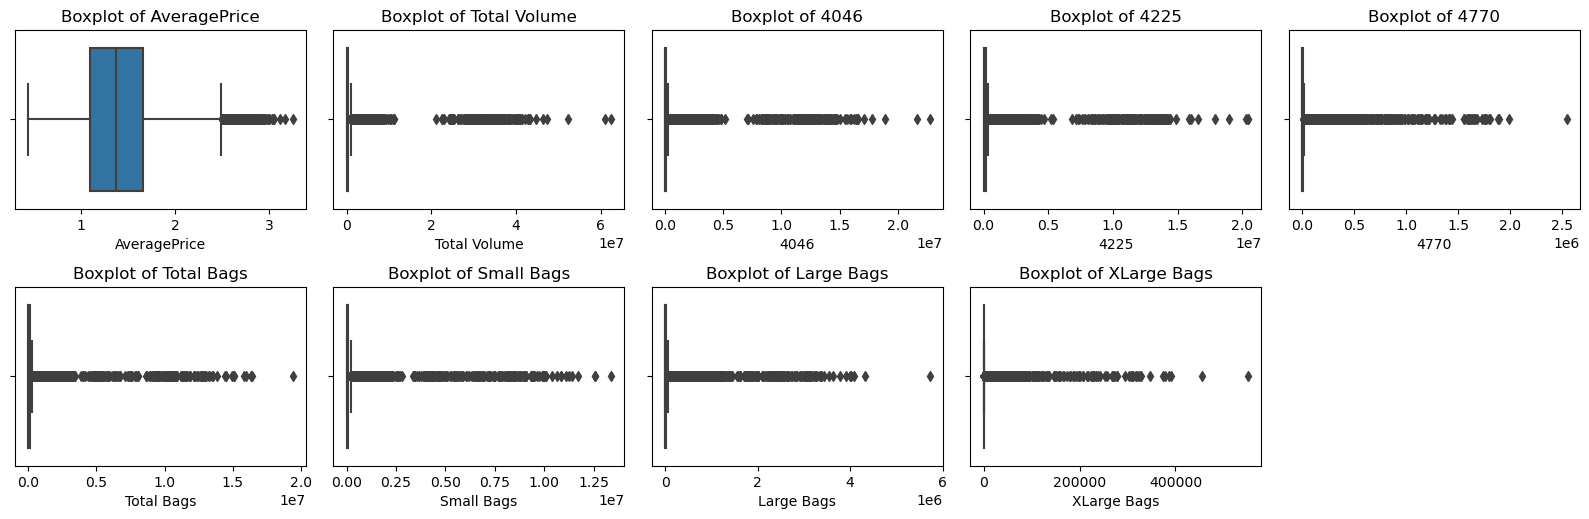

In [10]:
# Select numerical features for checking outliers


# Plot boxplots for each numerical feature
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x=avocado_data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

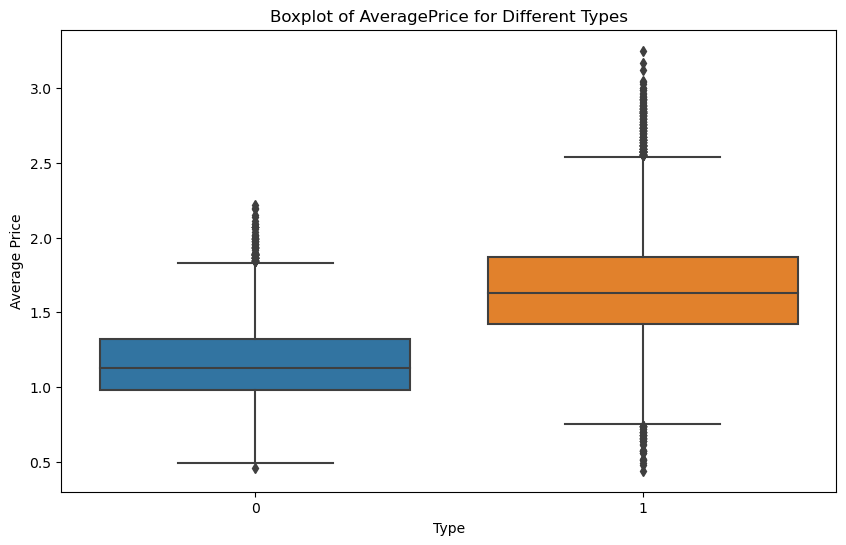

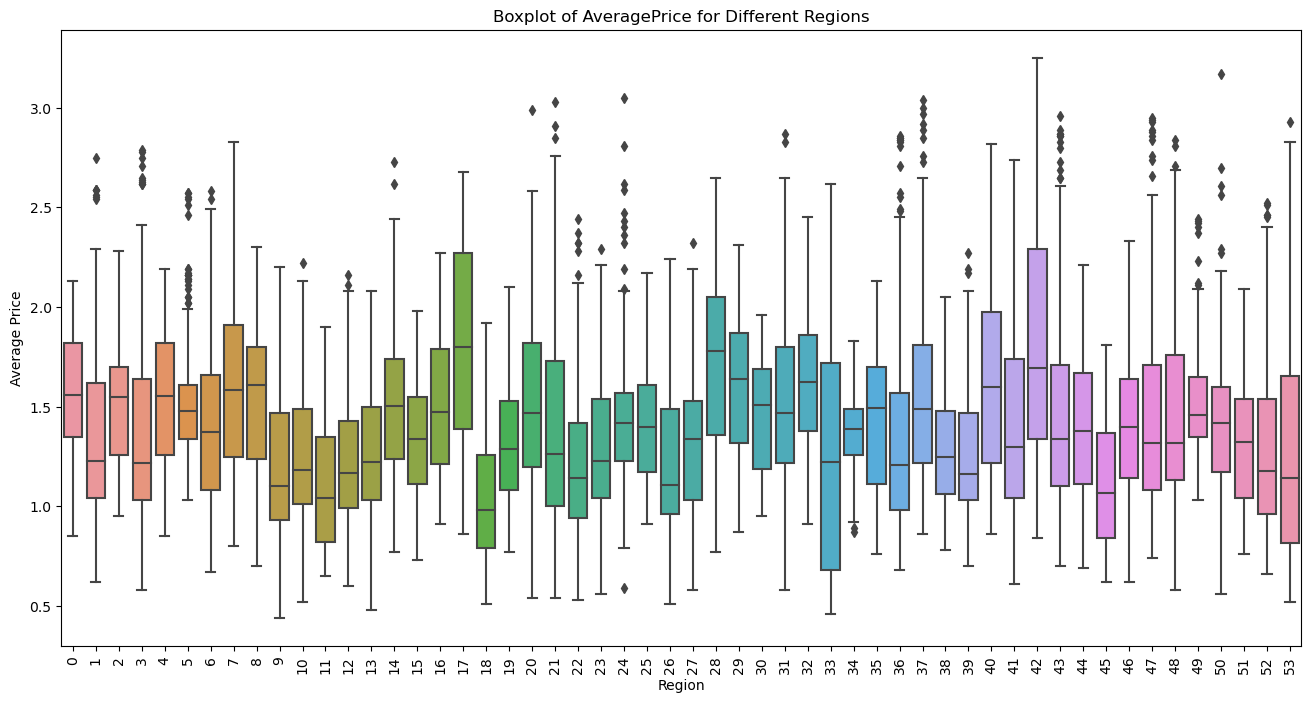

In [11]:
# Boxplot for 'type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='AveragePrice', data=avocado_data)
plt.title('Boxplot of AveragePrice for Different Types')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

# Boxplot for 'region'
plt.figure(figsize=(16, 8))
sns.boxplot(x='region', y='AveragePrice', data=avocado_data)
plt.title('Boxplot of AveragePrice for Different Regions')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


### 2.4 Correlation matrix and Heatmap

C:\Users\00094302\AppData\Local\Temp\ipykernel_1564\405344792.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = avocado_data.corr()


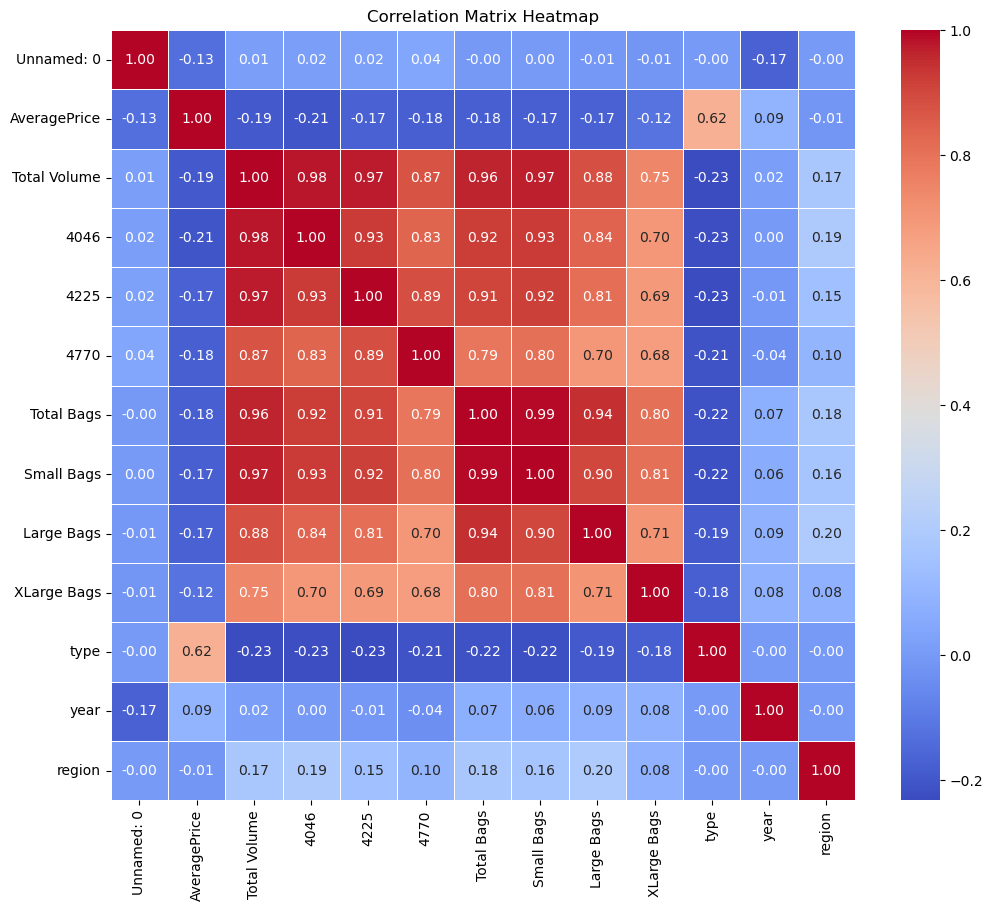

In [12]:

# Calculate the correlation matrix
correlation_matrix = avocado_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


- The Field 'date' to be dropped being time series data and may pose challenge in regression and classification.  
- The Field 'Unknown' to be dropped due to negligible effect on target variable and negligible correlation found 
- The Field 'Total Bags' is a derived variable, an addition of 3 variables- Small, Large and XLarge bags. Hence to be dropped.

In [13]:
# Drop the 0th (unknown), 1st (date) and 7th(total bags) columns from dataframe

avocado_data = avocado_data.drop(avocado_data.columns[[0, 1,7]], axis=1)
avocado_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0


## 3. Classification Task:
- Create a classification model to predict the region based on other features.


In [14]:
# Data Splitting
X_classification = avocado_data.drop(['region'], axis=1)
y_classification = avocado_data['region']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Model Selection and Training
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Model Evaluation
y_pred_clf = clf_model.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print("Classification Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test_clf, y_pred_clf)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
print("Confusion Matrix:\n", conf_matrix)

Classification Accuracy: 0.9112328767123288
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.89      0.89      0.89        73
           2       0.98      1.00      0.99        61
           3       0.93      0.88      0.90        72
           4       0.93      0.97      0.95        67
           5       0.86      0.82      0.84        73
           6       1.00      0.98      0.99        62
           7       0.97      0.87      0.92        76
           8       0.99      0.97      0.98        72
           9       0.97      0.91      0.94        65
          10       0.88      0.82      0.85        65
          11       0.97      0.99      0.98        68
          12       0.97      0.94      0.95        65
          13       0.84      0.85      0.84        66
          14       0.89      0.94      0.92        71
          15       0.99      0.97      0.98        69
          16 

RandomForestClassifier model correctly predicted the region of avocados for approximately 91.12% of the test set

In [15]:
avocado_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0


## 4. Comparison and selection of best performing classification model for given dataset


In [16]:
# Random Forest Classifier
clf_model_RFC = RandomForestClassifier(random_state=42)
clf_model_RFC.fit(X_train_clf, y_train_clf)

# Model Evaluation
y_pred_RFC = clf_model_RFC.predict(X_test_clf)
accuracy_RFC = accuracy_score(y_test_clf, y_pred_RFC)
print("Random Forest Classification Accuracy:", accuracy_RFC)


Random Forest Classification Accuracy: 0.9112328767123288


In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Scaling part
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clf)
X_test_scaled = scaler.transform(X_test_clf)

clf_model_LR = LogisticRegression(max_iter=1000)
clf_model_LR.fit(X_train_scaled_LR, y_train_clf)

# Model Evaluation
y_pred_LR = clf_model_LR.predict(X_test_scaled_LR)
accuracy_LR = accuracy_score(y_test_clf, y_pred_LR)
print("Logistic Regression Classification Accuracy:", accuracy_LR)


Logistic Regression Classification Accuracy: 0.33534246575342463


In [20]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

clf_model_ABC = AdaBoostClassifier()
clf_model_ABC.fit(X_train_scaled, y_train_clf)

# Model Evaluation
y_pred_ABC = clf_model_ABC.predict(X_test_scaled)
accuracy_ABC = accuracy_score(y_test_clf, y_pred_ABC)
print("AdaBoost Classification Accuracy:", accuracy_ABC)

AdaBoost Classification Accuracy: 0.05780821917808219


In [21]:
# SVC
from sklearn.svm import SVC

clf_model_SVC = SVC()
clf_model_SVC.fit(X_train_scaled, y_train_clf)

# Model Evaluation
y_pred_SVC = clf_model_SVC.predict(X_test_scaled)
accuracy_SVC = accuracy_score(y_test_clf, y_pred_SVC)
print("SVC Classification Accuracy:", accuracy_SVC)


SVC Classification Accuracy: 0.2641095890410959


In [22]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

clf_model_KNC = KNeighborsClassifier()
clf_model_KNC.fit(X_train_scaled, y_train_clf)

# Model Evaluation
y_pred_KNC = clf_model_KNC.predict(X_test_scaled)
accuracy_KNC = accuracy_score(y_test_clf, y_pred_KNC)
print("KNN Classification Accuracy:", accuracy_KNC)


KNN Classification Accuracy: 0.48684931506849316


In [23]:
# GaussianNB

from sklearn.naive_bayes import GaussianNB

clf_model_GNB = GaussianNB()
clf_model_GNB.fit(X_train_scaled, y_train_clf)

# Model Evaluation
y_pred_GNB = clf_model_GNB.predict(X_test_scaled)
accuracy_GNB = accuracy_score(y_test_clf, y_pred_GNB)
print("GNB Classification Accuracy:", accuracy_GNB)



GNB Classification Accuracy: 0.3128767123287671


In [24]:
# DecisionTreeClassifier

clf_model_DTC = DecisionTreeClassifier()
clf_model_DTC.fit(X_train_clf, y_train_clf)

# Model Evaluation
y_pred_DTC = clf_model_DTC.predict(X_test_clf)
accuracy_DTC = accuracy_score(y_test_clf, y_pred_DTC)
print("Decision Tree Classification Accuracy:", accuracy_DTC)


Decision Tree Classification Accuracy: 0.8076712328767123


### 4.1 Comparison of performance of various Classification Models

In [25]:
import pandas as pd

# Create a list to store evaluation metrics for each model
model_results = []

# RFC
model_results.append({
    'Model': 'Random Forest Classifier',
    'Classification accuracy': accuracy_RFC
})

# LR
model_results.append({
    'Model': 'Logistic Regression Classifier',
    'Classification accuracy': accuracy_LR
})


# ABC
model_results.append({
    'Model': 'AdaBoost Classifier',
    'Classification accuracy': accuracy_ABC
})

# SVC
model_results.append({
    'Model': 'SVC Classifier',
    'Classification accuracy': accuracy_SVC
})

# KNN
model_results.append({
    'Model': 'KNN Classifier',
    'Classification accuracy': accuracy_KNC
})

# GaussianNB
model_results.append({
    'Model': 'GaussianNB Classifier',
    'Classification accuracy': accuracy_GNB
})

# DecisionTree Classifier
model_results.append({
    'Model': 'DecisionTree Classifier',
    'Classification accuracy': accuracy_DTC
})

# Create a DataFrame from the list of results
model_comparison = pd.DataFrame(model_results)

# Display the model comparison table
print(model_comparison)


                            Model  Classification accuracy
0        Random Forest Classifier                 0.911233
1  Logistic Regression Classifier                 0.335342
2             AdaBoost Classifier                 0.057808
3                  SVC Classifier                 0.264110
4                  KNN Classifier                 0.486849
5           GaussianNB Classifier                 0.312877
6         DecisionTree Classifier                 0.807671


Random Forest Classifier has the best performace of 91.12 % accurancy

## 5. Predict the Region using classification based on sample input or user input
- since Random Forest Classifier has the best performance for the given dataset among the different tested models, the      prediction is done based on the same. 
- 5.1 using sample input
- 5.2 using user input

### 5.1 Predict the region - Using Sample input

In [26]:

# create a sample input as a DataFrame

sample_input = pd.DataFrame({
    'AveragePrice': [1.8],
    'Total Volume': [75000.0],
    '4046': [3000.0],
    '4225': [4000.0],
    '4770': [200.0],
    'Small Bags': [50000.0],
    'Large Bags': [7000.0],
    'XLarge Bags': [200.0],
    'type': [1],  # Assuming 1 represents 'organic' in your encoding
    'year': [2020],
})

# Make predictions using the trained Random Forest Classifier
predicted_region = clf_model_RFC.predict(sample_input)

print("Predicted Region:", predicted_region)

# Inverse transform the encoded 'region' back to the original values

predicted_region_value = label_encoder.inverse_transform(predicted_region)

print("\nPredicted Region Value: \033[1m", predicted_region_value)


Predicted Region: [46]

Predicted Region Value:  ['Southeast']


### 5.2 Predict the region - Using User input

In [28]:
import pandas as pd

# Take user inputs
sample_input = {}
for column in X_classification.columns:
    if column == 'type':
        value = input(f"Enter value for {column} (0 for conventional, 1 for organic): ")
        if value.strip():  # Check if the user entered a value
            sample_input[column] = int(value)
        else:
            # If the user pressed Enter without entering a value, prompt again
            print("Please enter a value for 'type'.")
            value = input(f"Enter value for {column} (0 for conventional, 1 for organic): ")
            sample_input[column] = int(value)
    elif column == 'year':
        value = input(f"Enter value for {column} (2015 or 2016 or 2017 or 2018 or 2019 or 2020): ")
        if value.strip():  # Check if the user entered a value
            sample_input[column] = int(value)
        else:
            # If the user pressed Enter without entering a value, prompt again
            print("Please enter a value for 'year'.")
            value = input(f"Enter value for {column} (2015 or 2016 or 2017 or 2018 or 2019 or 2020): ")
            sample_input[column] = int(value)
    else:
        value = input(f"Enter value for {column} (or press Enter to use mean value: {X_classification[column].mean()}): ")
        if value.strip():  # Check if the user entered a value
            sample_input[column] = float(value)
        else:
            # If the user pressed Enter, use the mean value for that column
            mean_value = X_classification[column].mean()
            print(f"Using mean value ({mean_value}) for {column}")
            sample_input[column] = float(mean_value)

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([sample_input])

# Make predictions for region
predicted_region = clf_model_RFC.predict(user_input_df)

# Print the predicted region
print('\n\nPredicted Region: \033[1m ', predicted_region[0])

# Inverse transform the encoded 'region' back to the original values

predicted_region_value = label_encoder.inverse_transform(predicted_region)

print("\nPredicted Region Value: \033[1m", predicted_region_value)


Enter value for AveragePrice (or press Enter to use mean value: 1.405978409775878): 
Using mean value (1.405978409775878) for AveragePrice
Enter value for Total Volume (or press Enter to use mean value: 850644.0130089321): 
Using mean value (850644.0130089321) for Total Volume
Enter value for 4046 (or press Enter to use mean value: 293008.4245306592): 
Using mean value (293008.4245306592) for 4046
Enter value for 4225 (or press Enter to use mean value: 295154.56835607433): 
Using mean value (295154.56835607433) for 4225
Enter value for 4770 (or press Enter to use mean value: 22839.73599265713): 
Using mean value (22839.73599265713) for 4770
Enter value for Small Bags (or press Enter to use mean value: 182194.68669570936): 
Using mean value (182194.68669570936) for Small Bags
Enter value for Large Bags (or press Enter to use mean value: 54338.08814455587): 
Using mean value (54338.08814455587) for Large Bags
Enter value for XLarge Bags (or press Enter to use mean value: 3106.42650720587

## 6. Regression Task:
- Create a classification model to predict the average price based on other features.


### 6.1 Split the data into training and testing sets for model evaluation.

In [31]:
avocado_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0


In [32]:
# Split the data into training and testing sets

X = avocado_data.drop('AveragePrice', axis=1)  # Features
y = avocado_data['AveragePrice']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Build a Regression model using the training data.


### 7.1 Build a machine learning model (Linear Regression)

In [33]:
# Build a machine learning model (Linear Regression)

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

## 8. Evaluate the model on the testing data.
- Linear Regression was run on test data
- An R-squared of 0.39 suggests that our model explains a small portion(39%) of the variability in the Average price.
- The MSE of 0.09 indicates the average squared error, providing a measure of how well our model's predictions align with the actual values.

Linear Regression - Mean Squared Error:  0.09752001175363675
Linear Regression - R-squared: 0.39303810204227263


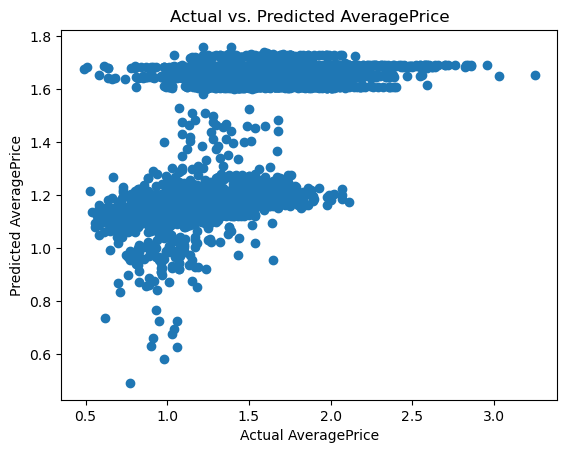

In [34]:
# Evaluate the model on the testing data
y_pred_LR = model_LR.predict(X_test)

# Print model evaluation metrics
print('Linear Regression - Mean Squared Error: ', mean_squared_error(y_test, y_pred_LR))
print('Linear Regression - R-squared:', r2_score(y_test, y_pred_LR))

# Optionally, we can visualize the actual vs. predicted values
plt.scatter(y_test, y_pred_LR)
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual vs. Predicted AveragePrice')
plt.show()

## 9. Comparison and selection of best performing Regression model for given dataset
- In summary, a higher R-squared and a lower MSE generally indicate better model performance.
- Among various models compared, Random Forest Regression is found best performing

### 9.1 MSE and R-Square for other Regression models

In [35]:
# Decision Trees
from sklearn.tree import DecisionTreeRegressor

# Build a machine learning model (Decision Tree)
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Print model evaluation metrics for Decision Tree
print('Decision Tree - Mean Squared Error:', mean_squared_error(y_test, y_pred_decision_tree))
print('Decision Tree - R-squared:', r2_score(y_test, y_pred_decision_tree))

Decision Tree - Mean Squared Error: 0.0496555890410959
Decision Tree - R-squared: 0.6909449657908954


In [36]:
# Support Vector Regression (SVR)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a machine learning model (SVR)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Evaluate the model on the testing data
y_pred_svr = svr_model.predict(X_test_scaled)

# Print model evaluation metrics for SVR
print('SVR - Mean Squared Error:', mean_squared_error(y_test, y_pred_svr))
print('SVR - R-squared:', r2_score(y_test, y_pred_svr))

SVR - Mean Squared Error: 0.07793337401470761
SVR - R-squared: 0.5149448020400558


In [37]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Build a machine learning model (Gradient Boosting Regressor)
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Print model evaluation metrics for Gradient Boosting Regressor
print('Gradient Boosting - Mean Squared Error:', mean_squared_error(y_test, y_pred_gradient_boosting))
print('Gradient Boosting - R-squared:', r2_score(y_test, y_pred_gradient_boosting))

Gradient Boosting - Mean Squared Error: 0.05448127131853784
Gradient Boosting - R-squared: 0.6609100506859154


In [38]:
# Neural Networks
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# Scale the features for Neural Networks
scaler_nn = MinMaxScaler()
X_train_scaled_nn = scaler_nn.fit_transform(X_train)
X_test_scaled_nn = scaler_nn.transform(X_test)

# Build a machine learning model (Neural Networks)
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train_scaled_nn, y_train)

# Evaluate the model on the testing data
y_pred_nn = nn_model.predict(X_test_scaled_nn)

# Print model evaluation metrics for Neural Networks
print('Neural Networks - Mean Squared Error:', mean_squared_error(y_test, y_pred_nn))
print('Neural Networks - R-squared:', r2_score(y_test, y_pred_nn))


Neural Networks - Mean Squared Error: 0.07922349413478931
Neural Networks - R-squared: 0.5069151295390264


In [39]:
# Ridge Regression
from sklearn.linear_model import Ridge

# Build a machine learning model (Ridge Regression)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred_ridge = ridge_model.predict(X_test)

# Print model evaluation metrics for Ridge Regression
print('Ridge Regression - Mean Squared Error:', mean_squared_error(y_test, y_pred_ridge))
print('Ridge Regression - R-squared:', r2_score(y_test, y_pred_ridge))


Ridge Regression - Mean Squared Error: 0.09751928974134344
Ridge Regression - R-squared: 0.39304259582712786


In [40]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Build a machine learning model (Random Forest)
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred_random_forest = random_forest_model.predict(X_test)

# Print model evaluation metrics for Random Forest
print('Random Forest - Mean Squared Error:', mean_squared_error(y_test, y_pred_random_forest))
print('Random Forest - R-squared:', r2_score(y_test, y_pred_random_forest))

Random Forest - Mean Squared Error: 0.024611026619178078
Random Forest - R-squared: 0.8468216404115907


### 9.2 Comparison of performance of various Regression Models

In [41]:
import pandas as pd

# Create a list to store evaluation metrics for each model
model_results = []

# Linear Regression
model_results.append({
    'Model': 'Linear Regression',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_LR),
    'R-squared': r2_score(y_test, y_pred_LR)
})

# Decision Tree
model_results.append({
    'Model': 'Decision Tree',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_decision_tree),
    'R-squared': r2_score(y_test, y_pred_decision_tree)
})

# Random Forest
model_results.append({
    'Model': 'Random Forest',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_random_forest),
    'R-squared': r2_score(y_test, y_pred_random_forest)
})

# SVR
model_results.append({
    'Model': 'SVR',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_svr),
    'R-squared': r2_score(y_test, y_pred_svr)
})

# Gradient Boosting
model_results.append({
    'Model': 'Gradient Boosting',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_gradient_boosting),
    'R-squared': r2_score(y_test, y_pred_gradient_boosting)
})

# Neural Networks
model_results.append({
    'Model': 'Neural Networks',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_nn),
    'R-squared': r2_score(y_test, y_pred_nn)
})

# Ridge Regression
model_results.append({
    'Model': 'Ridge Regression',
    'Mean Squared Error': mean_squared_error(y_test, y_pred_ridge),
    'R-squared': r2_score(y_test, y_pred_ridge)
})

# Create a DataFrame from the list of results
model_comparison = pd.DataFrame(model_results)

# Display the model comparison table
print(model_comparison)


               Model  Mean Squared Error  R-squared
0  Linear Regression            0.097520   0.393038
1      Decision Tree            0.049656   0.690945
2      Random Forest            0.024611   0.846822
3                SVR            0.077933   0.514945
4  Gradient Boosting            0.054481   0.660910
5    Neural Networks            0.079223   0.506915
6   Ridge Regression            0.097519   0.393043


Among various models compared, Random Forest Regression is found best performing with R-squared value of 0.84 

## 10. Predict the Average Price using Regression based on sample input or user input
- since Random Forest Regression has the best performance for the given dataset among the different tested ML models, the prediction is done based on the same. 
- 10.1 prediction using sample input
- 10.2 prediction using user input

### 10.1 Predict the Average Price - Using Sample input



 Predicted Average Price:   1.731900000000001


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


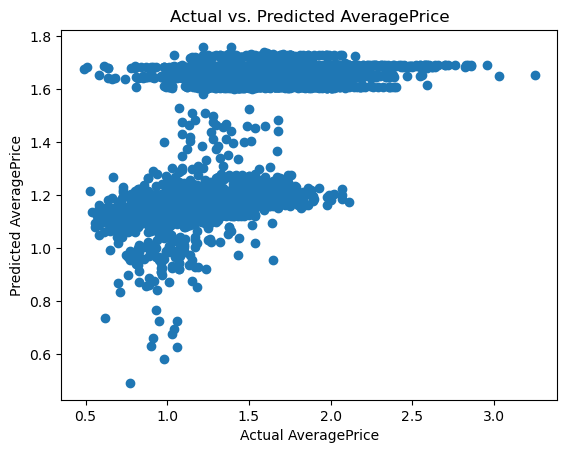

In [42]:
# Predict the Average Price against sample input
# create a sample input 

sample_input = [[90000, 900, 90000, 900, 9000, 90, 90, 1, 2018, 9]]

# Make predictions for Average price using random forest regression model
predicted_average = random_forest_model.predict(sample_input)

# Print the predicted Average price
print('\n\n Predicted Average Price: \033[1m ', predicted_average[0] ) 

# Optionally, we can visualize the actual vs. predicted values
plt.scatter(y_test, y_pred_LR)
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual vs. Predicted AveragePrice')
plt.show()

### 10.2 Predict the Average Price - Using User input

In [43]:
import pandas as pd

# Take user inputs
sample_input = {}
for column in X.columns:
    if column == 'type':
        value = input(f"Enter value for {column} (0 for conventional, 1 for organic): ")
        if value.strip():  # Check if the user entered a value
            sample_input[column] = int(value)
        else:
            # If the user pressed Enter without entering a value, prompt again
            print("Please enter a value for 'type'.")
            value = input(f"Enter value for {column} (0 for conventional, 1 for organic): ")
            sample_input[column] = int(value)
    elif column == 'year':
        value = input(f"Enter value for {column} (2015 or 2016 or 2017 or 2018 or 2019 or 2020): ")
        if value.strip():  # Check if the user entered a value
            sample_input[column] = int(value)
        else:
            # If the user pressed Enter without entering a value, prompt again
            print("Please enter a value for 'year'.")
            value = input(f"Enter value for {column} (2015 or 2016 or 2017 or 2018 or 2019 or 2020): ")
            sample_input[column] = int(value)
    elif column == 'region':
        # Assuming the encoded values range from 0 to n
        value_range = f"(0 to {X['region'].max()})"
        value = input(f"Enter value for {column} {value_range}: ")
        if value.strip():  # Check if the user entered a value
            region_max = X['region'].max()
            value = int(value)
            if 0 <= value <= region_max:
                sample_input[column] = value
            else:
                print(f"Value for {column} should be between 0 and {region_max}. Please enter a valid value.")
                value = input(f"Enter value for {column} {value_range}: ")
                sample_input[column] = int(value)
        else:
            print(f"Please enter a value for {column}.")
            value = input(f"Enter value for {column} {value_range}: ")
            sample_input[column] = int(value)
    else:
        value = input(f"Enter value for {column} (or press Enter to use mean value: {X[column].mean()}): ")
        if value.strip():  # Check if the user entered a value
            sample_input[column] = float(value)
        else:
            # If the user pressed Enter, use the mean value for that column
            mean_value = X[column].mean()
            print(f"Using mean value ({mean_value}) for {column}")
            sample_input[column] = float(mean_value)

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([sample_input])

# Make predictions for Average price
predicted_average = random_forest_model.predict(user_input_df)

# Print the predicted Average Price
print('\n\nPredicted Average Price: \033[1m ', predicted_average[0])


Enter value for Total Volume (or press Enter to use mean value: 850644.0130089321): 
Using mean value (850644.0130089321) for Total Volume
Enter value for 4046 (or press Enter to use mean value: 293008.4245306592): 
Using mean value (293008.4245306592) for 4046
Enter value for 4225 (or press Enter to use mean value: 295154.56835607433): 
Using mean value (295154.56835607433) for 4225
Enter value for 4770 (or press Enter to use mean value: 22839.73599265713): 
Using mean value (22839.73599265713) for 4770
Enter value for Small Bags (or press Enter to use mean value: 182194.68669570936): 
Using mean value (182194.68669570936) for Small Bags
Enter value for Large Bags (or press Enter to use mean value: 54338.08814455587): 
Using mean value (54338.08814455587) for Large Bags
Enter value for XLarge Bags (or press Enter to use mean value: 3106.426507205874): 
Using mean value (3106.426507205874) for XLarge Bags
Enter value for type (0 for conventional, 1 for organic): 0
Enter value for year 